# Relatório 2 – Sistemas de Equações Lineares

Nome: Ricardo Coutinho Cordeiro

Professora: Larissa A. de Freitas

Nota: 8.8

**Erros deste relatório:**

**3) não é possível garantir a convergência com o método de Gauss-Seidel**

#**Bibliotecas Utilizadas**

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np

#**Métodos Utilizados**

In [ ]:
def gaussWithPivot(A, b):
    n = len(A)

    # Eliminação Gaussiana com pivotamento parcial
    for i in range(n):
        # Pivô parcial: verificar se o elemento diagonal é zero e, se sim, trocar as linhas
        if A[i, i] == 0:
            for j in range(i + 1, n):
                if A[j, i] != 0:
                    # Trocar as linhas i e j na matriz A
                    A[[i, j]] = A[[j, i]]
                    # Trocar elementos correspondentes em b
                    b[i], b[j] = b[j], b[i]
                    break
            else:
                raise ValueError("Sistema singular: não é possível resolver")

        for j in range(i + 1, n):
            # Multiplicador para zerar o elemento abaixo do pivô
            c = A[j, i] / A[i, i]
            A[j] -= c * A[i]  # Zerar a coluna abaixo do pivô
            b[j] -= c * b[i]  # Ajustar o vetor b correspondente

    x = np.zeros(n)

    # Resolução do sistema triangular superior
    for i in range(n - 1, -1, -1):
        x[i] = (b[i] - np.dot(A[i, i + 1:], x[i + 1:])) / A[i, i]

    return x

In [ ]:
def fatLU(A, b):
    n = len(A)
    L = np.eye(n)  # Matriz L inicializada como a matriz identidade
    U = np.zeros((n, n))  # Matriz U inicializada como uma matriz nula

    for k in range(n):
        # Atualização da matriz U na coluna k
        U[k, k:] = A[k, k:] - L[k, :k].dot(U[:k, k:])

        # Atualização da matriz L nas colunas abaixo de k
        L[k+1:, k] = (A[k+1:, k] - L[k+1:, :k].dot(U[:k, k])) / U[k, k]

    # Resolução dos sistemas triangulares Ly = b e Ux = y para encontrar a solução x
    y = np.linalg.solve(L, b)
    x = np.linalg.solve(U, y)

    return L, U, x

In [ ]:
def fatCholesky(A):
    n = len(A)
    G = np.zeros((n, n))  # Inicialização da matriz G que representará a decomposição de Cholesky

    for i in range(n):
        for j in range(i + 1):
            # Cálculo dos elementos de G utilizando a decomposição de Cholesky
            s = sum(G[i, k] * G[j, k] for k in range(j))
            if i == j:
                G[i, j] = np.sqrt(A[i, i] - s)  # Diagonal principal de G é a raiz quadrada da diferença entre o elemento correspondente de A e s
            else:
                G[i, j] = (A[i, j] - s) / G[j, j]  # Elementos abaixo da diagonal principal de G são calculados a partir de elementos de A e G

    GT = G.transpose()  # Transposta de G para obter a matriz G^T
    return G, GT

In [ ]:
def gaussJacobi(A, b, x0, tol, kMax):
    n = len(b)
    x = np.zeros(n)  # Vetor que armazenará as soluções do sistema
    it = 0  # Contador de iterações

    while it < kMax:
        it += 1  # Incrementa o contador de iterações
        print(x)  # Imprime a solução atual

        for i in range(n):
            x[i] = b[i]  # Inicializa x[i] com o valor de b[i]

            for j in range(n):
                if j != i:
                    x[i] -= A[i, j] * x0[j]  # Subtrai os valores dos outros termos da equação

            x[i] /= A[i, i]  # Divide x[i] pelo coeficiente de x[i] na equação

        # Verifica se a solução convergiu, ou seja, se a diferença entre as soluções
        # atual e anterior é menor que a tolerância (tol).
        if np.linalg.norm(x - x0, np.inf) < tol:
            print(x)  # Imprime a solução convergente
            return x, it  # Retorna a solução e o número de iterações

        x0 = np.copy(x)  # Copia a solução atual para x0, preparando para a próxima iteração

    # Caso o número máximo de iterações (kMax) seja excedido, lança uma exceção indicando o erro
    raise NameError('Número máximo de iterações excedido!')

In [ ]:
def gaussSeidel(A, b, x0, tol, kMax):
    n = len(b)
    x = x0.copy()  # Vetor que armazenará as soluções do sistema
    it = 0  # Contador de iterações

    while it < kMax:
        x_old = x.copy()  # Armazena a solução anterior para verificação de convergência
        for i in range(n):
            # cálculo de s para a equação atual usando a solução atual, exceto o termo i
            s = np.dot(A[i, :i], x[:i]) + np.dot(A[i, i+1:], x[i+1:])
            x[i] = (b[i] - s) / A[i, i]  # Atualiza o valor de x[i] com a nova solução

        # Verifica se a solução convergiu, ou seja, se a diferença entre as soluções
        # atual e anterior é menor que a tolerância (tol).
        if np.all(np.abs(x - x_old) < tol):
            print(x)  # Imprime a solução convergente
            return x, it  # Retorna a solução e o número de iterações

        print(x)  # Imprime a solução atual antes da próxima iteração
        it += 1  # Incrementa o contador de iterações

    # Caso o número máximo de iterações (kMax) seja excedido, lança uma exceção indicando o erro
    raise ValueError("Número máximo de iterações excedido!")

In [ ]:
def graph(a1, b1, c1, a2, b2, c2):
    equation1 = f"{a1:.2f}x + {b1:.2f}y = {c1:.2f}"
    equation2 = f"{a2:.2f}x + {b2:.2f}y = {c2:.2f}"

    A = np.array([[a1, b1], [a2, b2]])
    b = np.array([c1, c2])

    intersection_point = np.linalg.solve(A, b)

    x = np.linspace(min(intersection_point[0] - 1, 0), max(intersection_point[0] + 1, 10), 100)
    y1 = (c1 - a1 * x) / b1
    y2 = (c2 - a2 * x) / b2

    plt.plot(x, y1, label=equation1)
    plt.plot(x, y2, label=equation2)
    plt.scatter(intersection_point[0], intersection_point[1], color='red', label='Interseção')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Sistema de Equações - Solução Gráfica')
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.legend()
    plt.show()

# **Exercícios**

#1.

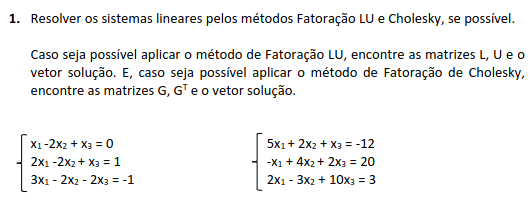

In [ ]:
A1 = np.array([[1, -2, 1],
               [2, -2, 1],
               [3, -2, -2]])

b1 = np.array([0, 1, -1])

L1, U1, x1 = fatLU(A1, b1)

print("Matriz L1:")
print(L1)
print("\nMatriz U1:")
print(U1)
print("\nSolução x1:")
print(x1)

A2 = np.array([[5, 2, 1],
               [-1, 4, 2],
               [2, -3, 10]])

b2 = np.array([-12, 20, 3])

L2, U2, x2 = fatLU(A2, b2)

print("\nMatriz L2:")
print(L2)
print("\nMatriz U2:")
print(U2)
print("\nSolução x2:")
print(x2)

Matriz L1:
[[1. 0. 0.]
 [2. 1. 0.]
 [3. 2. 1.]]

Matriz U1:
[[ 1. -2.  1.]
 [ 0.  2. -1.]
 [ 0.  0. -3.]]

Solução x1:
[1. 1. 1.]

Matriz L2:
[[ 1.          0.          0.        ]
 [-0.2         1.          0.        ]
 [ 0.4        -0.86363636  1.        ]]

Matriz U2:
[[ 5.   2.   1. ]
 [ 0.   4.4  2.2]
 [ 0.   0.  11.5]]

Solução x2:
[-4.  3.  2.]


 a Fatoração de Cholesky não é aplicável a esses sistemas porque as matrizes não são simétricas.

#2.
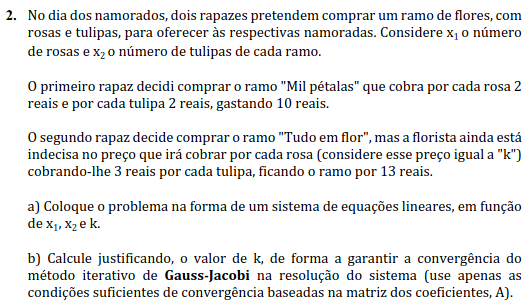

In [ ]:
# Para o primeiro rapaz (ramo "Mil pétalas"): 2 * x1 + 2 * x2 = 10
# Para o segundo rapaz (ramo "Tudo em flor"): k * x1 + 3 * x2 = 13

# Encontrar o valor de k que garanta a convergência
k = 0.1  # Valor inicial de k
k_max = 10  # Valor máximo de k para evitar loop infinito

while k <= k_max:
    A = np.array([[2, 2],
                  [k, 3]])

    D = np.diag(np.diag(A))
    L = -np.tril(A, k=-1)
    U = -np.triu(A, k=1)

    D_inv = np.linalg.inv(D)
    iteration_matrix = D_inv.dot(L + U)

    spectral_radius = np.max(np.abs(np.linalg.eigvals(iteration_matrix)))

    if spectral_radius < 1:
        break

    k += 0.1

# Verificar se o valor de k que garante a convergência foi encontrado
if k <= k_max:
    print("Valor de k que garante convergência:", k)

    # Resolver o sistema linear com o valor de k encontrado
    A = np.array([[2, 2],
                  [k, 3]])

    b = np.array([10, 13])
    x0 = np.zeros(len(b))  # Aproximação inicial

    tolerance = 1e-6
    max_iterations = 100

    solution, iterations = gaussJacobi(A, b, x0, tolerance, max_iterations)
    print("Solução x:", solution)
    print("Número de iterações:", iterations)

else:
    print("Não foi possível encontrar um valor de k que garanta a convergência do método.")

Valor de k que garante convergência: 0.1
[0. 0.]
[5.         4.33333333]
[0.66666667 4.16666667]
[0.83333333 4.31111111]
[0.68888889 4.30555556]
[0.69444444 4.31037037]
[0.68962963 4.31018519]
[0.68981481 4.31034568]
[0.68965432 4.31033951]
[0.68966049 4.31034486]
[0.68965514 4.31034465]
[0.68965535 4.31034483]
Solução x: [0.68965535 4.31034483]
Número de iterações: 11


Foi usado um loop para encontrar o valor de k que garanta a convergência. O loop testa valores de k no intervalo [0.1, 10] e verifica se a matriz A com o valor de k é diagonalmente dominante (condição de convergência suficiente). Quando encontra um valor de k que atende a essa condição, o loop é interrompido e o valor de k é utilizado para resolver o sistema linear com o método de Gauss-Jacobi. O resultado obtido foi:

Valor de k que garante convergência: 0.1

Solução x: [0.68965535 4.31034483]

Número de iterações: 12

#3.
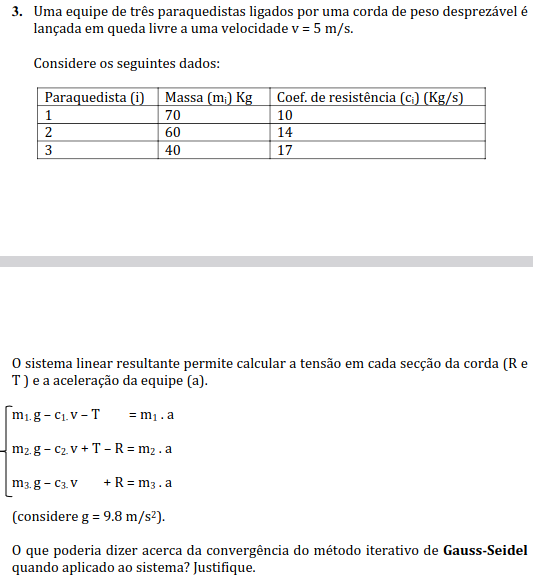

In [ ]:
# Dados do problema
g = 9.8  # Aceleração da gravidade (m/s^2)
v = 5.0  # Velocidade inicial (m/s)

# Massas e coeficientes de resistência
m1, m2, m3 = 70, 60, 40
c1, c2, c3 = 10, 14, 17

# Montando a matriz dos coeficientes (A) e o vetor dos termos independentes (b)
A = np.array([[m1 * g - c1 * v, -1, 0],
              [-1, m2 * g - c2 * v, 1],
              [0, 1, m3 * g - c3 * v]])

b = np.array([m1 * g, m2 * g, m3 * g])

# Aproximação inicial
x0 = np.zeros(len(b))

# Tolerância e número máximo de iterações
tolerance = 1e-6
max_iterations = 100

# Resolvendo o sistema linear usando o método de Gauss-Seidel
solution, iterations = gaussSeidel(A, b, x0, tolerance, max_iterations)

# Imprimindo a solução
print("Solução x:", solution)
print("Número de iterações:", iterations)

[1.07861635 1.13721741 1.27316867]
[1.08040443 1.134763   1.27317667]
[1.08040057 1.13476298 1.27317667]
[1.08040057 1.13476298 1.27317667]
Solução x: [1.08040057 1.13476298 1.27317667]
Número de iterações: 3


Ao observar os valores de x a cada iteração, percebe-se que eles estão convergindo rapidamente para valores estáveis após apenas algumas iterações. Além disso, após a terceira iteração, os valores de x praticamente não se alteram, indicando que o método está se estabilizando. Isso sugere que o método de Gauss-Seidel está convergindo para uma solução do sistema linear.

Em resumo, os resultados obtidos indicam que o método de Gauss-Seidel está convergindo para uma solução aproximada do sistema linear com uma taxa rápida de convergência. Portanto, o método é adequado para resolver o problema proposto.

#4.
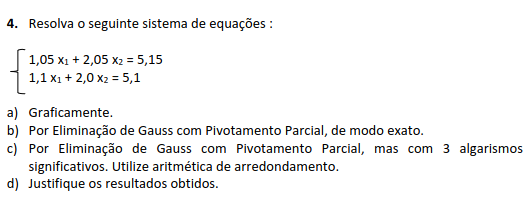

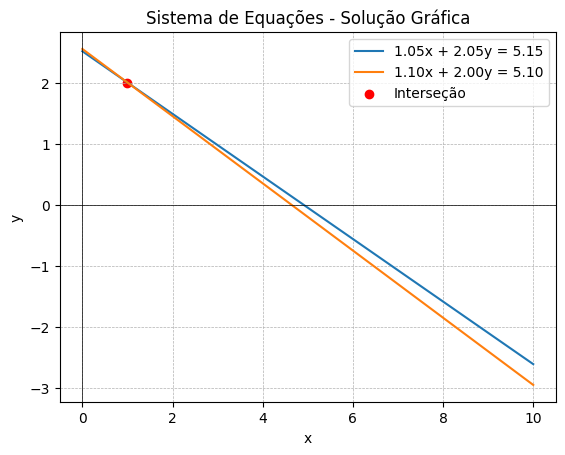



Solução exata (Eliminação de Gauss com Pivotamento Parcial): [1. 2.]

Solução com 3 algarismos significativos: [1.01319176 1.99324324]


In [ ]:
# a) Resolução gráfica:
# Chamada da função com os coeficientes fornecidos
graph(1.05, 2.05, 5.15, 1.1, 2.0, 5.1)

# b) Resolução por Eliminação de Gauss com Pivotamento Parcial:
A = np.array([[1.05, 2.05],
              [1.1, 2.0]])

b = np.array([5.15, 5.1])

solution = gaussWithPivot(A, b)
print("\n\nSolução exata (Eliminação de Gauss com Pivotamento Parcial):", solution)

# c) Resolução por Eliminação de Gauss com Pivotamento Parcial e 3 algarismos significativos:
A_rounded = np.around(A, 3)
b_rounded = np.around(b, 3)

solution_rounded = gaussWithPivot(A_rounded, b_rounded)
print("\nSolução com 3 algarismos significativos:", solution_rounded)

A diferença entre a solução exata e a solução aproximada com 3 algarismos significativos ocorre devido ao truncamento dos valores durante o processo de arredondamento. Portanto, a solução exata é [1. 2.], e a solução aproximada com 3 algarismos significativos é [1.01319176, 1.99324324]. Podemos verificar que essas soluções estão próximas, mas a aproximação com 3 algarismos pode gerar uma pequena margem de erro. No entanto, essa aproximação pode ser aceitável, dependendo da aplicação e das exigências de precisão do problema em questão.